# Practical 3

### Goals

1.  Continue working with [clustering](http://scikit-learn.org/stable/modules/clustering.html)
    and [classification](http://scikit-learn.org/stable/modules/svm.html)
    algorithms
2.  Work on [linear regression models](http://scikit-learn.org/stable/modules/linear_model.html)
3.  Start working on [neural network models](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)
    including single and multilayered perceptrons.
4.  Work on [decision trees](https://en.wikipedia.org/wiki/Decision_tree) and [random forests](https://en.wikipedia.org/wiki/Random_forest).
5.  Continue working on the [recommender system](https://en.wikipedia.org/wiki/Recommender_system)



## Exercise 1 \[★\]

We will now work with **linear regression** (refer [here](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)).

Let's see some simple programs. In the following data, where we have
some sample data for the equation: *y = x*. We will first train our
Linear Regression model with a very small subset and test whether it is
able to predict *y-*values for new *x-*values.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression

numarray = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])

lr = LinearRegression()
lr.fit(numarray[:, 0].reshape(-1, 1), numarray[:, 1].reshape(-1, 1))

# printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(x_predict.reshape(-1, 1))
y_predict

Next, we have some sample data for the equation: *y = x + 1*. We will
train our Linear Regression model test whether it is able to predict
*y-*values for new *x-*values.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression

numarray = np.array([[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

lr = LinearRegression()
lr.fit(numarray[:, 0].reshape(-1, 1), numarray[:, 1].reshape(-1, 1))

# printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(x_predict.reshape(-1, 1))
y_predict

But, what if we tried the Linear Regression model for the equation: *y =
x<sup>2</sup>*. What did you observe with the following code? Did it predict the
*y-*values correctly?



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression

numarray = np.array([[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25]])

lr = LinearRegression()
lr.fit(numarray[:, 0].reshape(-1, 1), numarray[:, 1].reshape(-1, 1))

# printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(x_predict.reshape(-1, 1))
y_predict

Now, Let's repeat the above experiment by making use of Polynomial
features. Try changing the value of *degree* in the code given below.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

numarray = np.array([[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25]])

# using polynomial features
pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(numarray[:, 0].reshape(-1, 1))
lr = LinearRegression()
lr.fit(x_poly, numarray[:, 1].reshape(-1, 1))

# printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(pf.fit_transform(x_predict.reshape(-1, 1)))
y_predict

Now let's try with third order polynomial equation (cubic equation).



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

numarray = np.array([[0, 0], [1, 1], [2, 8], [3, 27], [4, 64], [5, 125]])

# using polynomial features
pf = PolynomialFeatures(degree=3)
x_poly = pf.fit_transform(numarray[:, 0].reshape(-1, 1))
lr = LinearRegression()
lr.fit(x_poly, numarray[:, 1].reshape(-1, 1))

# printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(pf.fit_transform(x_predict.reshape(-1, 1)))
y_predict

Download the file [population.csv](../../data/population.csv)
(source: query given in [references](./references.html)). We will first
plot this multi-annual population.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

dataset = np.loadtxt(
    "../../data/population.csv",
    dtype={"names": ("year", "population"), "formats": ("i4", "i")},
    skiprows=1,
    delimiter=",",
    encoding="UTF-8",
)

df = pd.DataFrame(dataset)
df.plot(x="year", y="population", kind="scatter")

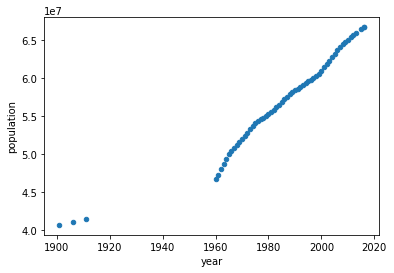

We will focus on data starting from 1960 (why?). Our goal is to use
regression techniques to predict population. But we don't know how to
verify. So with the available data, we create two categories: training
data and test data.

Now continuing with the population data (from TP1 and TP2), we split it
into two: training data and test data. We will plot the actual
population values and the predicted values.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.linear_model import LinearRegression

dataset = np.loadtxt(
    "../../data/population.csv",
    dtype={"names": ("year", "population"), "formats": ("i4", "i")},
    skiprows=1,
    delimiter=",",
    encoding="UTF-8",
)

df = pd.DataFrame(dataset[4:])

# training data
x_train = df["year"][:40].values.reshape(-1, 1)
y_train = df["population"][:40].values.reshape(-1, 1)

# training
lr = LinearRegression()
lr.fit(x_train, y_train)

# printing coefficients
print(lr.intercept_, lr.coef_)

# prediction
x_predict = x_train = df["year"][41:].values.reshape(-1, 1)
y_actual = df["population"][41:].values.reshape(-1, 1)
y_predict = lr.predict(x_predict)

plot.scatter(x_predict, y_actual)
plot.plot(x_predict, y_predict, color="red", linewidth=2)
plot.show()

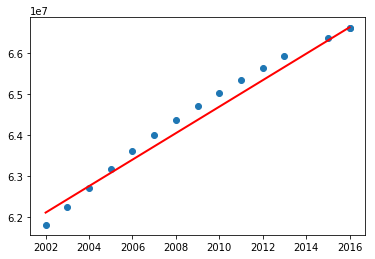

Now test the above program including the data before 1960. What did you
notice? You may have got the following graph.

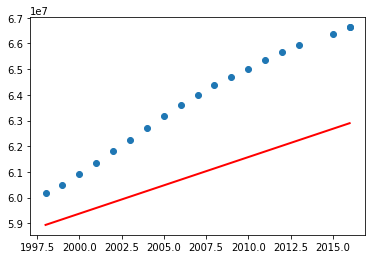

What are your observations? So the above program using linear regression
perfectly fit for a subset of data. Let's now try with **polynomial
features** with degree 2 (refer [Polynomial Regression: Extending linear models](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)).



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

dataset = np.loadtxt(
    "../../data/population.csv",
    dtype={"names": ("year", "population"), "formats": ("i4", "i")},
    skiprows=1,
    delimiter=",",
    encoding="UTF-8",
)

df = pd.DataFrame(dataset[4:])

# training data

x_train = df["year"][:50].values.reshape(-1, 1)
y_train = df["population"][:50].values.reshape(-1, 1)

pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x_train)

# training
lr = LinearRegression()
lr.fit(x_poly, y_train)

# printing coefficients
print(lr.intercept_, lr.coef_)

# prediction
x_predict = x_train = df["year"][41:].values.reshape(-1, 1)
y_actual = df["population"][41:].values.reshape(-1, 1)
y_predict = lr.predict(pf.fit_transform(x_predict))

plot.scatter(x_predict, y_actual)
plot.plot(x_predict, y_predict, color="red", linewidth=2)
plot.show()

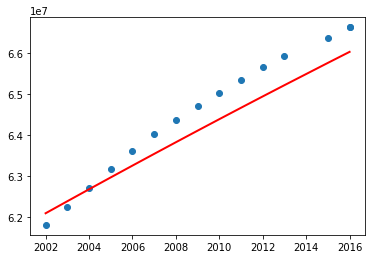

Before jumping into a conclusion, let's consider the entire data and
see.

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

dataset = np.loadtxt(
    "../../data/population.csv",
    dtype={"names": ("year", "population"), "formats": ("i4", "i")},
    skiprows=1,
    delimiter=",",
    encoding="UTF-8",
)

df = pd.DataFrame(dataset)

# training data

x_train = df["year"][:40].values.reshape(-1, 1)
y_train = df["population"][:40].values.reshape(-1, 1)

pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x_train)

# training
lr = LinearRegression()
lr.fit(x_poly, y_train)

# printing coefficients
print(lr.intercept_, lr.coef_)

# prediction
x_predict = x_train = df["year"][41:].values.reshape(-1, 1)

# Let's add some more years
x_predict = np.append(range(1900, 1959), x_predict)
x_predict = x_predict.reshape(-1, 1)

y_actual = df["population"][41:].values.reshape(-1, 1)
y_predict = lr.predict(pf.fit_transform(x_predict))

plot.scatter(df["year"], df["population"])
plot.plot(x_predict, y_predict, color="red", linewidth=2)
plot.show()

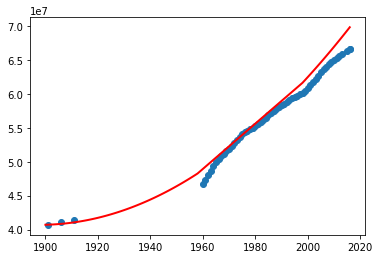

What do you think? Can we use this program to predict the missing data
(especially in the absence of other external source of information)? Try
the above program with different degrees.



## Exercise 2 \[★★\]

Classifiers are helpful to classify our dataset into one or more
classes. But unlike clustering algorithms, it's the user who has to
classify the data in a classification algorithm. In the following
exercises, we see different classifiers, starting with perceptron. Look
at the input data (*numarray*) and the associated labels (*result*).
Here, we will label the complete dataset and see whether our model
(Perceptron) did work well.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import Perceptron

numarray = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 1],
        [0, 1, 1, 0],
        [0, 1, 1, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 1],
        [1, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 0, 1],
        [1, 1, 1, 0],
        [1, 1, 1, 1],
    ]
)
result = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

perceptron = Perceptron(max_iter=1000)
perceptron.fit(numarray, result)

x_predict = np.array([[0, 1, 0, 1], [1, 0, 1, 1]])

y_predict = perceptron.predict(x_predict)
y_predict

Now we will remove some labeled/classified data and see the predicted
results.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import Perceptron

numarray = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 1, 1, 1],
        [1, 0, 0, 1],
        [1, 0, 1, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 1],
    ]
)
result = np.array([0, 0, 0, 0, 1, 1, 1, 1])

perceptron = Perceptron(max_iter=1000)
perceptron.fit(numarray, result)

x_predict = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 1]])

y_predict = perceptron.predict(x_predict)
y_predict

Now, we will try another classifer: MLPClassifier



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.neural_network import MLPClassifier

numarray = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 1, 1, 1],
        [1, 0, 0, 1],
        [1, 0, 1, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 1],
    ]
)

result = np.array([0, 0, 0, 0, 1, 1, 1, 1])

mlpclassifier = MLPClassifier(alpha=2, max_iter=1000)
mlpclassifier.fit(numarray, result)

x_predict = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 1]])

y_predict = mlpclassifier.predict(x_predict)
y_predict

Now, we will try another classifer using support vector machines.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn import datasets, svm, metrics

numarray = numarray = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 1, 1, 1],
        [1, 0, 0, 1],
        [1, 0, 1, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 1],
    ]
)

result = np.array([0, 0, 0, 0, 1, 1, 1, 1])

svcclassifier = svm.SVC(gamma=0.001, C=100.0)
svcclassifier.fit(numarray, result)

x_predict = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 1]])

y_predict = svcclassifier.predict(x_predict)
y_predict

We will now use scikit-learn and the classifiers seen above to recognize
handwriting. Scikit-learn has a lot of datasets. We will use one such
dataset called digits dataset, which consists of labeled handwriting
images of digits. The following program will show the labels.



In [ ]:
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()

print(np.unique(digits.target))

We will now see the total number of images and the contents of one test
image.

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plot

digits = datasets.load_digits()

print("Number of images: ", digits.images.size)
print("Input data: ", digits.images[0])
print("Label:", digits.target[0])

plot.imshow(digits.images[0], cmap=plot.cm.gray_r)
plot.show()

We will now use a support vector classifier to train the data. We will
split our data into two: training data and test data. Remember that we
already have labels for the entire dataset.



In [ ]:
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plot

digits = datasets.load_digits()

training_images = digits.images[: int(digits.images.shape[0] / 2)]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[0 : int(digits.target.shape[0] / 2)]

classifier = svm.SVC(gamma=0.001, C=100.0)

# training
classifier.fit(training_images, training_target)

# prediction
predict_image = digits.images[int(digits.images.shape[0] / 2) + 2]
print("Predicted value: ", classifier.predict(predict_image.reshape(1, -1)))

plot.imshow(predict_image, cmap=plot.cm.gray_r)
plot.show()

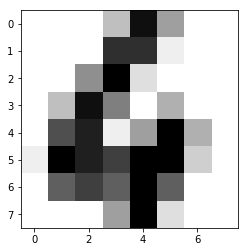

Now let's try predicting the remaining labels and use the classifcation
report to get the precision of prediction.



In [ ]:
from sklearn import datasets, svm, metrics
import numpy as np
import matplotlib.pyplot as plot

digits = datasets.load_digits()

training_images = digits.images[: int(digits.images.shape[0] / 2)]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[0 : int(digits.target.shape[0] / 2)]

classifier = svm.SVC(gamma=0.001, C=100.0)
# training
classifier.fit(training_images, training_target)

# prediction
predict_images = digits.images[int(digits.images.shape[0] / 2) + 1 :]
actual_labels = digits.target[int(digits.target.shape[0] / 2) + 1 :]
predicted_labels = classifier.predict(
    predict_images.reshape((predict_images.shape[0], -1))
)

# classification report
print(metrics.classification_report(actual_labels, predicted_labels))

There are other classifiers available. We will now work with Perceptron
(refer
[here](http://scikit-learn.org/stable/modules/linear_model.html#perceptron))
and see its performance.



In [ ]:
from sklearn import datasets, metrics
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plot

digits = datasets.load_digits()

training_images = digits.images[: int(digits.images.shape[0] / 2)]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[0 : int(digits.target.shape[0] / 2)]

classifier = Perceptron(max_iter=1000)
# training
classifier.fit(training_images, training_target)

# prediction
predict_images = digits.images[int(digits.images.shape[0] / 2) + 1 :]
actual_labels = digits.target[int(digits.target.shape[0] / 2) + 1 :]
predicted_labels = classifier.predict(
    predict_images.reshape((predict_images.shape[0], -1))
)

# classification report
print(metrics.classification_report(actual_labels, predicted_labels))

Finally, we will finish the test with Multilayer Perceptron (refer
[here](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron)).

In [ ]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plot

digits = datasets.load_digits()

training_images = digits.images[: int(digits.images.shape[0] / 2)]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[0 : int(digits.target.shape[0] / 2)]

classifier = MLPClassifier(alpha=2, max_iter=1000)
# training
classifier.fit(training_images, training_target)

# prediction
predict_images = digits.images[int(digits.images.shape[0] / 2) + 1 :]
actual_labels = digits.target[int(digits.target.shape[0] / 2) + 1 :]
predicted_labels = classifier.predict(
    predict_images.reshape((predict_images.shape[0], -1))
)

# classification report
print(metrics.classification_report(actual_labels, predicted_labels))

Did you try changing the number of hidden layers?

What are your observations after trying the different classifiers?

Your next question is to plot the confusion metrics for all the above
three classifiers.



## Exercise 3 \[★★\]

In this practical session, we start experimenting with decision trees.
We will first build a Decision Tree Classifier using a very simple
example. Like the classifiers we have seen before, we will first try to
fit our data and then predict a class for a previously unseen value.



In [ ]:
from sklearn import tree

data = [[0, 0], [1, 1], [1, 0]]

result = [1, 0, 1]
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, result)
dtc.predict([[1, 1]])

Our next goal is to visualize the decision tree. Look at the following
code and see how we have given names to the two columns of the above
data. We also gave name names to the *result* data entries, calling them
*class1* and *class2*.



For the next code, you may need to install graphviz and pydotplus

In [ ]:
! pip3 install graphviz pydotplus

You may need to run `sudo apt install graphviz` in the terminal for installing graphviz executable.

In [ ]:
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image, display

data = [[0, 0], [1, 1], [1, 0]]
result = [1, 0, 1]
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, result)

dot_data = tree.export_graphviz(
    dtc,
    out_file=None,
    feature_names=["column1", "column2"],
    filled=True,
    rounded=True,
    class_names=["class1", "class2"],
)
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

Now, let's take some realistic example. In the following code, we
consider 13 photographs marked by a user as 'Favorite' and
'NotFavorite'. For every photograph: we have four information: color,
tag, size (medium sized, thumbnail etc.) and mode in which the
photograph was taken (portrait or landscape). We will build a Decision
Tree Classifier with this data. We will then predict whether our user
will like a photograph of nature which has a predominant color red, of
thumbnail size and taken in portrait mode.

In the following code, we display two values. We predict whether the
user will favorite the photograph or not. We also display the importance
of each of the features: color, tag, size and mode.



In [ ]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = [
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "architecture", "medium", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["yellow", "nature", "medium", "portrait"],
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "people", "medium", "landscape"],
    ["blue", "nature", "thumbnail", "portrait"],
    ["yellow", "architecture", "thumbnail", "landscape"],
    ["blue", "people", "medium", "portrait"],
    ["yellow", "nature", "medium", "landscape"],
    ["yellow", "people", "thumbnail", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["red", "architecture", "thumbnail", "landscape"],
]
result = [
    "Favorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
]


# creating dataframes
dataframe = pd.DataFrame(data, columns=["color", "tag", "size", "mode"])
resultframe = pd.DataFrame(result, columns=["favorite"])

# generating numerical labels
le1 = LabelEncoder()
dataframe["color"] = le1.fit_transform(dataframe["color"])

le2 = LabelEncoder()
dataframe["tag"] = le2.fit_transform(dataframe["tag"])

le3 = LabelEncoder()
dataframe["size"] = le3.fit_transform(dataframe["size"])

le4 = LabelEncoder()
dataframe["mode"] = le4.fit_transform(dataframe["mode"])

le5 = LabelEncoder()
resultframe["favorite"] = le5.fit_transform(resultframe["favorite"])

# Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe.values, resultframe)

# prediction
prediction = dtc.predict(
    [
        [
            le1.transform(["red"])[0],
            le2.transform(["nature"])[0],
            le3.transform(["thumbnail"])[0],
            le4.transform(["portrait"])[0],
        ]
    ]
)
print(le5.inverse_transform(prediction))
print(dtc.feature_importances_)

What are your observations?



Our next goal is to visualize the above decision tree. Test the code
below. It's similar to the code we tested before. Take a look at the
classes and the features.



In [ ]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

data = [
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "architecture", "medium", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["yellow", "nature", "medium", "portrait"],
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "people", "medium", "landscape"],
    ["blue", "nature", "thumbnail", "portrait"],
    ["yellow", "architecture", "thumbnail", "landscape"],
    ["blue", "people", "medium", "portrait"],
    ["yellow", "nature", "medium", "landscape"],
    ["yellow", "people", "thumbnail", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["red", "architecture", "thumbnail", "landscape"],
]
result = [
    "Favorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
]


# creating dataframes
dataframe = pd.DataFrame(data, columns=["color", "tag", "size", "mode"])
resultframe = pd.DataFrame(result, columns=["favorite"])

# generating numerical labels
le1 = LabelEncoder()
dataframe["color"] = le1.fit_transform(dataframe["color"])

le2 = LabelEncoder()
dataframe["tag"] = le2.fit_transform(dataframe["tag"])

le3 = LabelEncoder()
dataframe["size"] = le3.fit_transform(dataframe["size"])

le4 = LabelEncoder()
dataframe["mode"] = le4.fit_transform(dataframe["mode"])

le5 = LabelEncoder()
resultframe["favorite"] = le5.fit_transform(resultframe["favorite"])

# Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

dot_data = tree.export_graphviz(
    dtc,
    out_file=None,
    feature_names=dataframe.columns,
    filled=True,
    rounded=True,
    class_names=le5.inverse_transform(resultframe.favorite.unique()),
)
graph = graphviz.Source(dot_data)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

What if we had a possibility of multiple decision trees? Let's predict
using a Random Forest Classifier (can be seen as a collection of
multiple decision trees). Check the predicted value as well as the
importance of the different features. Note that we are asking to create
10 such estimators using a maximum depth of 2 for each of the estimator.



In [ ]:
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

data = [
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "architecture", "medium", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["yellow", "nature", "medium", "portrait"],
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "people", "medium", "landscape"],
    ["blue", "nature", "thumbnail", "portrait"],
    ["yellow", "architecture", "thumbnail", "landscape"],
    ["blue", "people", "medium", "portrait"],
    ["yellow", "nature", "medium", "landscape"],
    ["yellow", "people", "thumbnail", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["red", "architecture", "thumbnail", "landscape"],
]
result = [
    "Favorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
]


# creating dataframes
dataframe = pd.DataFrame(data, columns=["color", "tag", "size", "mode"])
resultframe = pd.DataFrame(result, columns=["favorite"])

# generating numerical labels
le1 = LabelEncoder()
dataframe["color"] = le1.fit_transform(dataframe["color"])

le2 = LabelEncoder()
dataframe["tag"] = le2.fit_transform(dataframe["tag"])

le3 = LabelEncoder()
dataframe["size"] = le3.fit_transform(dataframe["size"])

le4 = LabelEncoder()
dataframe["mode"] = le4.fit_transform(dataframe["mode"])

le5 = LabelEncoder()
resultframe["favorite"] = le5.fit_transform(resultframe["favorite"])

# Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
rfc = rfc.fit(dataframe.values, resultframe.values.ravel())

# prediction
prediction = rfc.predict(
    [
        [
            le1.transform(["red"])[0],
            le2.transform(["nature"])[0],
            le3.transform(["thumbnail"])[0],
            le4.transform(["portrait"])[0],
        ]
    ]
)
print(le5.inverse_transform(prediction))
print(rfc.feature_importances_)

Finally we visualize these estimators.



In [ ]:
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

data = [
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "architecture", "medium", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["yellow", "nature", "medium", "portrait"],
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "people", "medium", "landscape"],
    ["blue", "nature", "thumbnail", "portrait"],
    ["yellow", "architecture", "thumbnail", "landscape"],
    ["blue", "people", "medium", "portrait"],
    ["yellow", "nature", "medium", "landscape"],
    ["yellow", "people", "thumbnail", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["red", "architecture", "thumbnail", "landscape"],
]
result = [
    "Favorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
]


# creating dataframes
dataframe = pd.DataFrame(data, columns=["color", "tag", "size", "mode"])
resultframe = pd.DataFrame(result, columns=["favorite"])

# generating numerical labels
le1 = LabelEncoder()
dataframe["color"] = le1.fit_transform(dataframe["color"])

le2 = LabelEncoder()
dataframe["tag"] = le2.fit_transform(dataframe["tag"])

le3 = LabelEncoder()
dataframe["size"] = le3.fit_transform(dataframe["size"])

le4 = LabelEncoder()
dataframe["mode"] = le4.fit_transform(dataframe["mode"])

le5 = LabelEncoder()
resultframe["favorite"] = le5.fit_transform(resultframe["favorite"])

# Use of decision tree classifiers
rfc = RandomForestClassifier(
    n_estimators=10,
    max_depth=3,
    random_state=0,
)
rfc = rfc.fit(dataframe.values, resultframe.values.ravel())

for i in range(10):
    dot_data = tree.export_graphviz(
        rfc.estimators_[i],
        out_file=None,
        feature_names=dataframe.columns,
        filled=True,
        rounded=True,
        class_names=le5.inverse_transform(resultframe.favorite.unique()),
    )
    graph = graphviz.Source(dot_data)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    img = Image(pydot_graph.create_png())
    display(img)

## Exercise 4 \[★★\]



We now split our MNIST (handwriting) data into two: training data and
test data for creating models for prediction and we fed the complete
training data to our classifier. However, in real life, we may have new
data to train. Check the following code using perceptron and compare it
with the code of exercise 3.3



In [ ]:
from sklearn import datasets, metrics
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plot

digits = datasets.load_digits()
training_size = int(digits.images.shape[0] / 2)

training_images = digits.images[0:training_size]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[0:training_size]

classifier = Perceptron(max_iter=1000)
# training
for i in range(training_size):
    training_data = np.array(training_images[i])
    training_data = training_data.reshape(1, -1)
    classifier.partial_fit(
        training_data, [training_target[i]], classes=np.unique(digits.target)
    )

# prediction
predict_images = digits.images[training_size + 1 :]
actual_labels = digits.target[training_size + 1 :]
predicted_labels = classifier.predict(
    predict_images.reshape((predict_images.shape[0], -1))
)

# classification report
print(metrics.classification_report(actual_labels, predicted_labels))

This approach is called [online machine
training](https://en.wikipedia.org/wiki/Online_machine_learning) (or
[algorithme d'apprentissage incrémental
(fr)](https://fr.wikipedia.org/wiki/Algorithme_d%27apprentissage_incr%C3%A9mental)).
Did you get good precision?

Your next question is to modify the above program and test online
training with **MLPClassifier**.

Try modifying (reducing and increasing) the training data size. What are
your observations?



Did it work? Let's now try to get the accuracy of our model. Will it
work for our entire test data?



What is the accuracy that you got? Now change the number of neurons in
each layer (currently it is set to 50 each). Also try to increase the
number of hidden layers. Did your accuracy improve?

